In [1]:
# setup
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
rand = np.random.RandomState(42)
from pandas.tools.plotting import andrews_curves, parallel_coordinates, radviz

Load Data Files
==

![Alt text](data description.JPG)

In [11]:
# read files
data = pd.read_csv('training (1).csv')
test = pd.read_csv('testingCandidate (1).csv')
data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,49.0,self-employed,married,basic.9y,no,yes,no,telephone,may,thu,...,1.1,93.994,-36.4,4.860,5191.0,999.0,0,no,NaN,1
1,NaN,housemaid,married,professional.course,no,no,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,NaN,2
2,45.0,management,divorced,university.degree,no,no,no,cellular,apr,tue,...,-1.8,93.075,-47.1,1.453,5099.1,999.0,0,no,NaN,3
3,44.0,blue-collar,married,basic.4y,unknown,no,no,telephone,may,thu,...,1.1,93.994,-36.4,4.855,5191.0,999.0,0,no,NaN,4
4,38.0,blue-collar,married,NaN,no,no,no,cellular,nov,mon,...,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no,NaN,5


In [26]:
data.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail           int64
responded          object
profit            float64
id                  int64
dtype: object

### make categorical data astype `category`

In [31]:
for col in ['profession', 'marital', 'schooling', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'responded']:
    data[col] = data[col].astype('category')

In [15]:
data.shape

(8238, 24)

In [33]:
# Data Description
data.describe(include='all')

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
count,6224.000000,8238,8238,5832,8238,8238,8238,8238,8238,7451,...,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238,928.000000,8238.000000
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN
freq,NaN,2102,4957,1731,6619,4300,6775,5243,2814,1598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7310,NaN,NaN
mean,39.953728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501,NaN,172.112069,4119.500000
std,10.540516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101,NaN,128.999186,2378.250092
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,NaN,-276.000000,1.000000
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,NaN,124.000000,2060.250000
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,NaN,170.000000,4119.500000
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,NaN,213.250000,6178.750000


In [69]:
for col in data.columns:
    if data[col].dtype.name=='category':
        print(data[col].unique())

[self-employed, housemaid, management, blue-collar, technician, ..., retired, services, unemployed, student, unknown]
Length: 12
Categories (12, object): [self-employed, housemaid, management, blue-collar, ..., services, unemployed, student, unknown]
[married, divorced, single, unknown]
Categories (4, object): [married, divorced, single, unknown]
[basic.9y, professional.course, university.degree, basic.4y, unknown, high.school, basic.6y, illiterate]
Categories (8, object): [basic.9y, professional.course, university.degree, basic.4y, unknown, high.school, basic.6y, illiterate]
[no, unknown, yes]
Categories (3, object): [no, unknown, yes]
[yes, no, unknown]
Categories (3, object): [yes, no, unknown]
[no, yes, unknown]
Categories (3, object): [no, yes, unknown]
[telephone, cellular]
Categories (2, object): [telephone, cellular]
[may, jul, apr, nov, jun, aug, mar, sep, oct, dec]
Categories (10, object): [may, jul, apr, nov, ..., mar, sep, oct, dec]
[thu, tue, mon, fri, wed, NaN]
Categories

Data Cleaning
==

There is missingness in column `custAge`, `schooling` and `day_of_week`. Let's look into those columns to figure it out.

In [60]:
data['month'].unique()

[may, jul, apr, nov, jun, aug, mar, sep, oct, dec]
Categories (10, object): [may, jul, apr, nov, ..., mar, sep, oct, dec]

In [13]:
data.isnull().any()

custAge            True
profession        False
marital           False
schooling          True
default           False
housing           False
loan              False
contact           False
month             False
day_of_week        True
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
pmonths           False
pastEmail         False
responded         False
profit             True
id                False
dtype: bool

In [34]:
data[data['custAge'].isnull()];

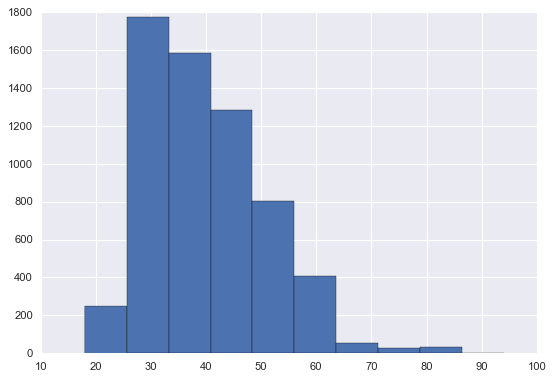

In [50]:
plt.hist(data['custAge'].dropna());

In [40]:
data['schooling'].unique()

[basic.9y, professional.course, university.degree, basic.4y, unknown, high.school, basic.6y, illiterate]
Categories (8, object): [basic.9y, professional.course, university.degree, basic.4y, unknown, high.school, basic.6y, illiterate]

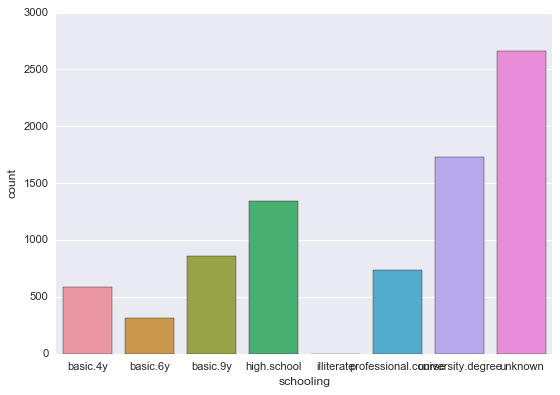

In [51]:
sns.countplot(x="schooling", data=data);

In [39]:
data.loc[data['schooling'].isnull(),'schooling'] = 'unknown'

In [41]:
data['day_of_week'].unique()

[thu, tue, mon, fri, wed, NaN]
Categories (5, object): [thu, tue, mon, fri, wed]

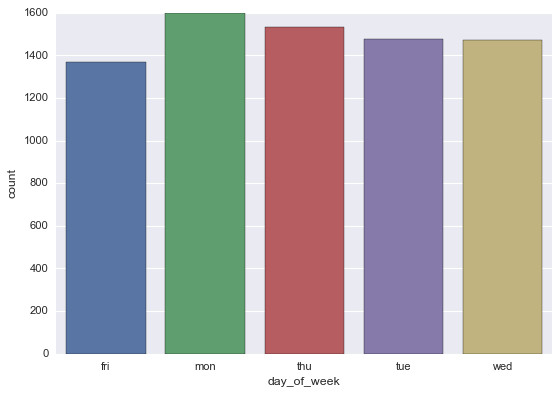

In [49]:
sns.countplot(x="day_of_week", data=data);

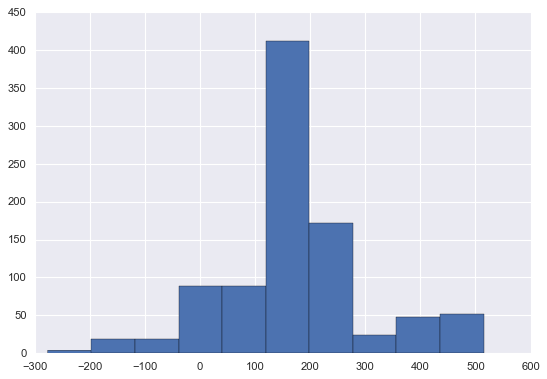

In [44]:
plt.hist(data['profit'].dropna());

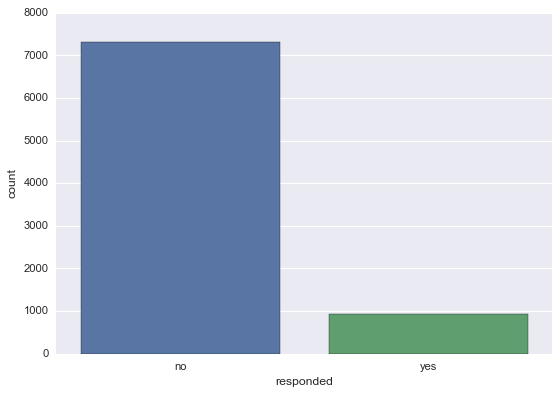

In [55]:
sns.countplot(x="responded", data=data);